In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings


In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/offcial17/schulich_data_science/main/Datasets/bikes_sharing.csv')

In [3]:
bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
missing_values = (bikes.isnull()+bikes.isna()).sum()
duplicates = bikes.duplicated().sum()
dtypes = bikes.dtypes
unique = bikes.nunique()

insights = pd.DataFrame({
    'missing_values' : missing_values,
    'duplicates': duplicates,
    'data_types': dtypes,
    'unique_values': unique
})
insights

,missing_values,duplicates,data_types,unique_values
datetime,0,0,object,10886
season,0,0,int64,4
holiday,0,0,int64,2
workingday,0,0,int64,2
weather,0,0,int64,4
temp,0,0,float64,49
atemp,0,0,float64,60
humidity,0,0,int64,89
windspeed,0,0,float64,28
casual,0,0,int64,309


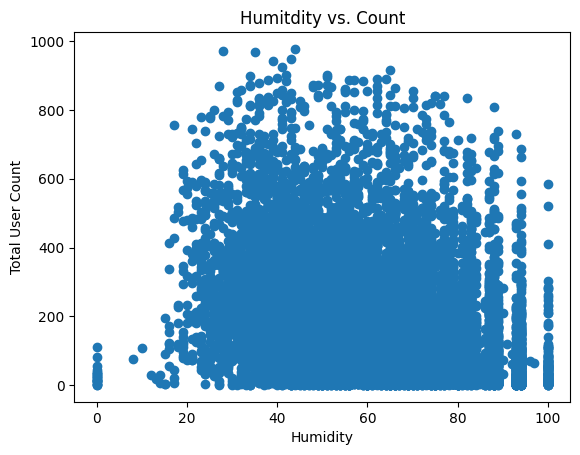

In [6]:
plt.scatter(bikes['humidity'],bikes['count'])
plt.xlabel('Humidity')
plt.ylabel('Total User Count')
plt.title('Humitdity vs. Count')
plt.show()

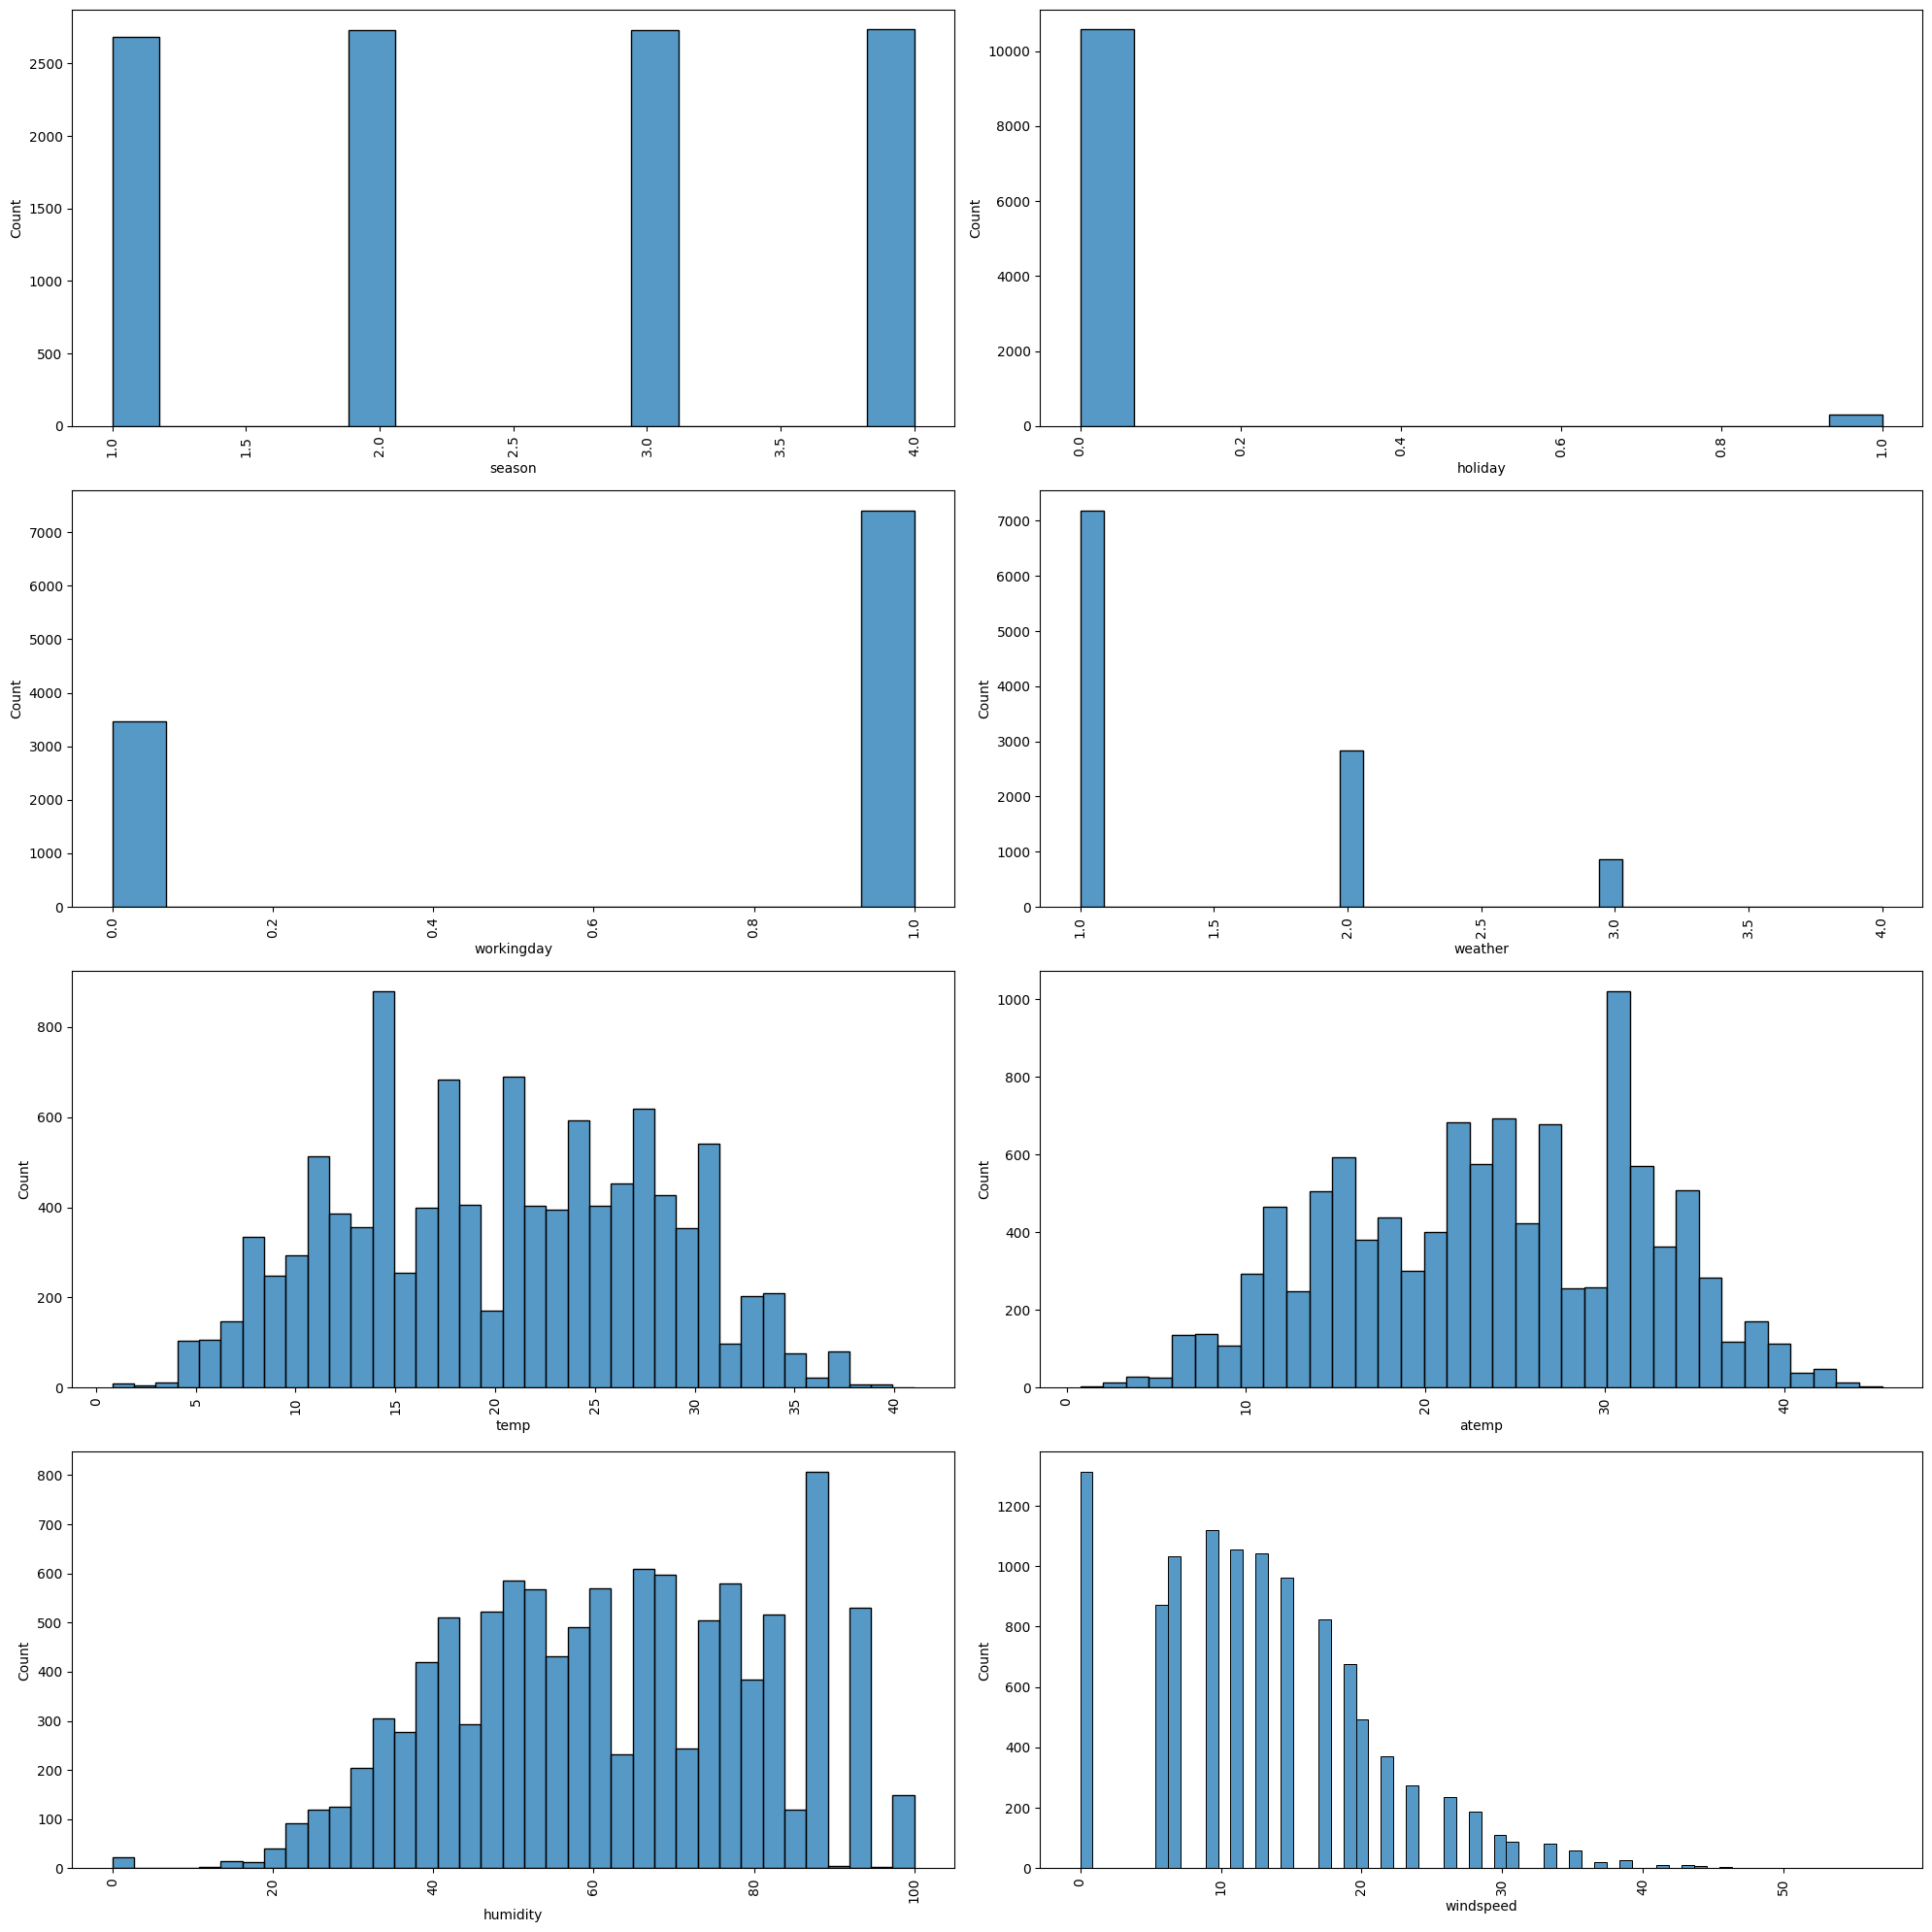

In [7]:
numerical_columns = bikes.select_dtypes(include=[np.number]) 
data = numerical_columns.iloc[:,:-3] # choosing variables except target variable

num_cols = data.shape[1]

warnings.filterwarnings('ignore')
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

axes = axes.flatten()

# Iterating over each column
for i, col in enumerate(data.columns):
    ax = axes[i]
    sns.histplot(x=data[col], ax=ax)
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    


# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [8]:
numerical_columns = bikes.select_dtypes(include=[np.number])  # select all numerical columns
corr_matrix = numerical_columns.corr()

corr_matrix["count"].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

<Axes: >

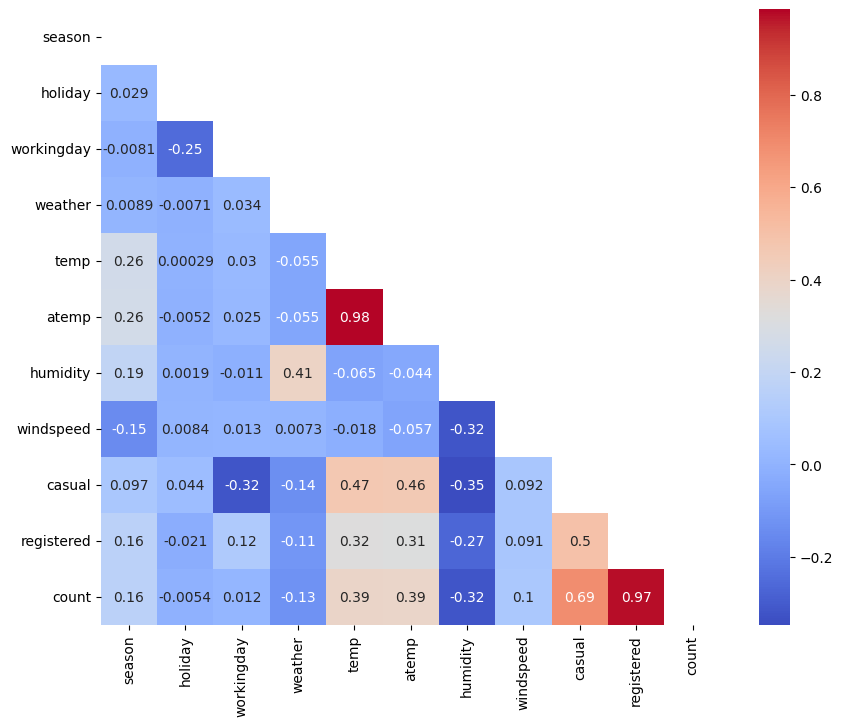

In [9]:
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask,annot=True, cmap='coolwarm')

In [10]:
x = bikes[['temp','humidity','season','weather']]
y = bikes['count']

In [11]:
results = ols('y~x', data=bikes).fit() #finding the line of best fit - ols(ordianry least sqaures) is a type of model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     947.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:53:22   Log-Likelihood:                -70419.
No. Observations:               10886   AIC:                         1.408e+05
Df Residuals:                   10881   BIC:                         1.409e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    159.5207      6.931     23.016      0.0

In [12]:
pred_vals = results.predict(bikes[['temp','humidity','season']])
pred_vals 

0         13.490881
1         10.160598
2         10.160598
3         32.204122
4         32.204122
            ...    
10881    222.936324
10882    194.655054
10883    175.730404
10884    175.730404
10885    153.686881
Length: 10886, dtype: float64

In [13]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),bikes['count']],axis=1)
res

,y_hat,count
0,13.490881,16
1,10.160598,40
2,10.160598,32
3,32.204122,13
4,32.204122,1
...,...,...
10881,222.936324,336
10882,194.655054,241
10883,175.730404,168
10884,175.730404,129


In [14]:
res['error']=res['y_hat']-res['count']
res

,y_hat,count,error
0,13.490881,16,-2.509119
1,10.160598,40,-29.839402
2,10.160598,32,-21.839402
3,32.204122,13,19.204122
4,32.204122,1,31.204122
...,...,...,...
10881,222.936324,336,-113.063676
10882,194.655054,241,-46.344946
10883,175.730404,168,7.730404
10884,175.730404,129,46.730404


In [15]:
res['sq_error']=res['error']**2
np.sqrt(res['sq_error'].mean())

155.99832684186404

(array([  36.,  131.,  183.,  356.,  644., 1233., 2706., 3658., 1707.,
         232.]),
 array([-685.07099797, -583.36871874, -481.6664395 , -379.96416027,
        -278.26188104, -176.5596018 ,  -74.85732257,   26.84495666,
         128.5472359 ,  230.24951513,  331.95179437]),
 <BarContainer object of 10 artists>)

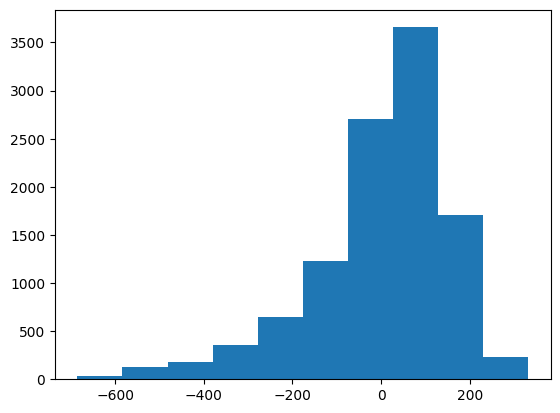

In [16]:
plt.hist(res['error'])

In [17]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([-685.07099797, -667.60100203, -662.03492512, ...,  328.16987205,
          329.95179437,  331.95179437])),
 (149.94747912890062, 3.15320256003401e-13, 0.9608935896815217))

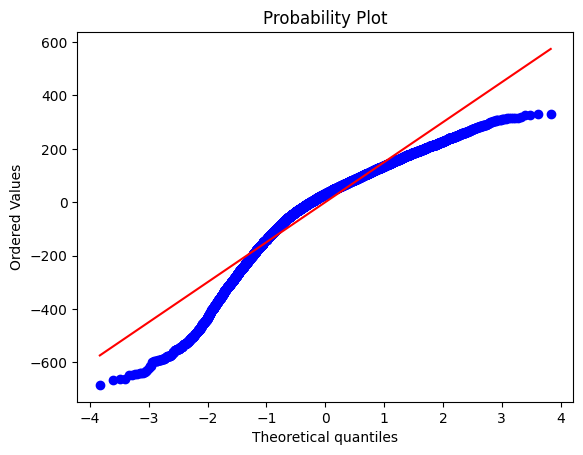

In [18]:
#Q-Q Plot
import scipy.stats as stats
fig =plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'],dist='norm',plot=ax)

The output observation states that when the probability plot of the residuals was generated, most of the points on the plot were close to a straight line. This suggests that the residuals have a distribution that is relatively close to a normal distribution. While the plot may not be a perfect straight line, the fact that most points align along a line indicates that the residuals approximately follow a normal distribution. This is a positive sign, as it implies that the assumptions of normality for the residuals in linear regression are reasonably satisfied, which is important for the validity of regression inference and predictions.

When residuals are distributed normally, it means that the errors or discrepancies between the predicted values and the actual observed values of the response variable (often denoted as "residuals") follow a bell-shaped normal distribution. In the context of linear regression analysis, having normally distributed residuals is important for several reasons:

1. **Statistical Inference:** Many statistical tests and inference procedures assume that the residuals are normally distributed. This includes hypothesis testing, confidence intervals, and p-values associated with the regression coefficients. When residuals are normally distributed, these statistical results are more reliable and valid.

2. **Model Assumptions:** Linear regression assumes that the errors (residuals) have constant variance and are normally distributed with a mean of zero. Violations of these assumptions can lead to biased and inefficient parameter estimates, which can affect the overall interpretation of the model.

3. **Confidence in Predictions:** Normally distributed residuals indicate that the model's predictions are unbiased on average and have consistent variability across different levels of predictor variables. This gives more confidence in the accuracy of predictions made by the model.

4. **Outlier Detection:** A normal distribution of residuals helps in identifying outliers more accurately. Outliers are observations that deviate significantly from the expected pattern. When residuals are normally distributed, it's easier to distinguish between true outliers and random fluctuations.

5. **Model Evaluation:** Normally distributed residuals are an indicator that the model is capturing the underlying patterns and relationships in the data reasonably well. Deviations from normality could suggest missing predictor variables, non-linear relationships, or other model inadequacies.

6. **Prediction Intervals:** Normality of residuals is important for constructing valid prediction intervals around the model's predictions. Prediction intervals provide a range within which future observations are likely to fall with a certain level of confidence.

In summary, when residuals are distributed normally, it suggests that the assumptions of the linear regression model are being met and that the model's results are more reliable and interpretable. However, it's important to note that while normality is a desirable property, minor departures from perfect normality may not have a substantial impact on the validity of regression results, especially if the sample size is large.

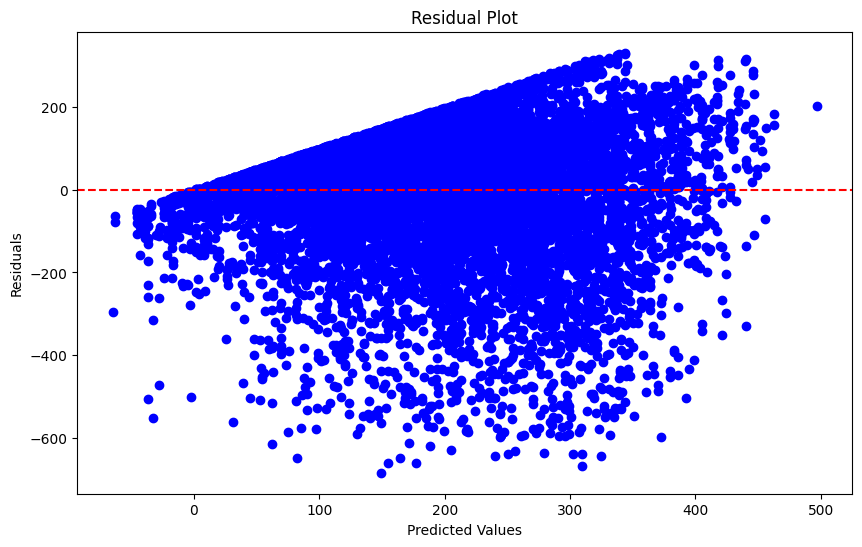

In [19]:
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_vals, res['error'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

A residual plot is used to visualize the residuals (differences between observed and predicted values) from a regression analysis. In a residual plot, you usually plot the predicted values (or the independent variable values) on the x-axis and the residuals on the y-axis. The main purpose of a residual plot is to assess the assumptions of a regression model, including checking for homoscedasticity (constant variance), linearity, and normality of residuals. A well-behaved residual plot should show random scatter around the zero line, indicating that the model's assumptions are met.




When you observe that about 40% of the points in a residual plot are above the y=0 line (representing positive residuals) and they are closely spaced, while around 60% of the points are below the y=0 line (representing negative residuals) and they are more scattered, it indicates a potential issue with the assumption of homoscedasticity in a linear regression model.

Homoscedasticity refers to the assumption that the residuals have constant variance across all levels of the predictor variable(s). In other words, the spread or dispersion of residuals should be roughly the same for different values of the independent variable(s). When the spread of residuals is not consistent, it is called heteroscedasticity.

The pattern you described in the residual plot suggests the presence of heteroscedasticity:

Positive Residuals Pattern: The fact that about 40% of the points are above the y=0 line and closely spaced indicates that the model tends to underestimate the response variable for these cases. This could suggest that the model is not capturing certain patterns or variability in the data that leads to higher actual values.

Negative Residuals Pattern: The larger spread of points below the y=0 line suggests that the model has a harder time predicting the response variable for these cases. This indicates increased variability or inconsistency in the errors for these values.

The combination of closely spaced positive residuals and more scattered negative residuals suggests that the model's errors are not uniformly distributed across the range of the independent variable(s), violating the homoscedasticity assumption. Heteroscedasticity can affect the reliability and interpretability of regression coefficients and p-values, potentially leading to biased estimates.

To address this issue, you might consider applying transformations to the response variable or the predictor variables, using weighted least squares, or considering the inclusion of additional predictor variables that can better explain the variability in the response variable for different ranges.







When your residual plot is biased and heteroscedastic, it indicates potential problems with the assumptions and performance of your linear regression model. Let's break down what each of these terms means in the context of a residual plot:

1. **Biased Residuals**:
   Biased residuals refer to a systematic pattern in the residuals that suggests your model consistently overestimates or underestimates the actual values of the dependent variable. In other words, the residuals are not randomly distributed around the zero line, which is the ideal scenario. Instead, they consistently deviate in one direction, either above or below the zero line. This bias could indicate that your model is not capturing certain underlying patterns or relationships in the data.

2. **Heteroscedasticity**:
   Heteroscedasticity means that the spread or variability of the residuals is not constant across all levels of the independent variable(s). In a heteroscedastic residual plot, you'll see that the width of the spread of residuals changes as you move along the x-axis. This can lead to wider spreads for some ranges of x-values and narrower spreads for others. Heteroscedasticity violates the assumption of homoscedasticity, where the residuals should have a consistent spread across all values of the independent variable(s).

When both bias and heteroscedasticity are present in your residual plot, it suggests that your linear regression model is not adequately capturing the true underlying relationships between the independent and dependent variables. This can lead to inaccurate predictions and unreliable inference about the relationships between variables. It might also indicate omitted variables, incorrect functional forms, or interactions that your model hasn't accounted for.

Addressing these issues might involve re-evaluating your model's assumptions, considering the inclusion of additional variables, applying appropriate transformations to the dependent or independent variables, and exploring alternative modeling techniques. Detecting and addressing bias and heteroscedasticity are important steps in building reliable and accurate regression models.

Yes, it is possible to have a biased and heteroscedastic residual plot while still having a relatively straight-line probability plot or Q-Q plot (quantile-quantile plot) for the same data. These plots examine different aspects of the model's assumptions and residuals:

1. **Residual Plot (Biased and Heteroscedastic)**:
   The residual plot primarily focuses on the distribution of the residuals and their relationship with the predicted values (or the independent variables). It looks at how the residuals deviate from the ideal straight line at y=0 and whether the spread of the residuals changes as you move along the x-axis. A biased and heteroscedastic residual plot indicates potential issues with the model's fit and suggests that the model is not capturing the underlying patterns accurately.

2. **Probability Plot or Q-Q Plot**:
   The probability plot or Q-Q plot, on the other hand, assesses whether the residuals follow a normal distribution. It compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot closely follow a straight line, it suggests that the residuals are approximately normally distributed. However, this assessment of normality doesn't directly address biases or variability in the residuals.

In summary, a residual plot and a probability plot or Q-Q plot provide complementary information about different aspects of your regression model's assumptions. While it might seem contradictory to have a biased and heteroscedastic residual plot alongside a relatively straight-line probability plot, it's important to interpret these plots in their respective contexts. A straight-line probability plot doesn't necessarily mean that the model's fit is perfect or that it accurately captures the relationships between variables; it only suggests that the residuals are approximately normally distributed. Detecting and addressing bias and heteroscedasticity in the residual plot remains crucial for improving the overall reliability and accuracy of your regression model.

In [30]:
#influence_summary
infl =results.get_influence()
influence_summary = infl.summary_frame()  # Compute influence summary
influence_summary

,dfb_Intercept,dfb_x[0],dfb_x[1],dfb_x[2],dfb_x[3],cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.000136,-0.000137,0.000245,-0.000209,-0.000200,3.276322e-08,0.016086,0.000633,0.000405,0.016085,0.000405
1,0.001773,-0.001837,0.002785,-0.002403,-0.002337,4.650968e-06,0.191297,0.000635,0.004822,0.191289,0.004822
2,0.001298,-0.001345,0.002038,-0.001759,-0.001711,2.491406e-06,0.140010,0.000635,0.003529,0.140004,0.003529
3,-0.001248,0.001089,-0.001461,0.001505,0.001362,1.642902e-06,-0.123110,0.000542,-0.002866,-0.123104,-0.002866
4,-0.002028,0.001770,-0.002374,0.002445,0.002213,4.337573e-06,-0.200037,0.000542,-0.004657,-0.200028,-0.004657
...,...,...,...,...,...,...,...,...,...,...,...
10881,0.005395,-0.007608,-0.005444,0.011799,-0.002413,4.723551e-05,0.724771,0.000449,0.015368,0.724756,0.015368
10882,0.001784,-0.003308,-0.001100,0.004661,-0.001468,7.561869e-06,0.297082,0.000428,0.006149,0.297069,0.006149
10883,-0.000269,0.000592,0.000078,-0.000767,0.000291,2.165234e-07,-0.049554,0.000441,-0.001040,-0.049552,-0.001040
10884,-0.001624,0.003580,0.000471,-0.004635,0.001758,7.912241e-06,-0.299554,0.000441,-0.006290,-0.299542,-0.006290


These metrics are commonly used in the context of regression analysis to assess the influence of individual data points on the model. Here's what each of these metrics means:

1. **dfb_Intercept**: DFBETAS for the intercept term. It measures the change in the estimated intercept when a particular observation is excluded.

2. **dfb_x[0], dfb_x[1], dfb_x[2], dfb_x[3], ...**: DFBETAS for the corresponding predictor variables (x[0], x[1], x[2], x[3], ...). These metrics indicate how much the estimated coefficients of the predictor variables change when a specific observation is omitted.

3. **cooks_d**: Cook's Distance for the observation. It quantifies the influence of the observation on the model fit and estimates. Large values suggest that the observation has a significant impact on the model.

4. **standard_resid**: Standardized residuals for the observation. These are the residuals (the difference between the observed and predicted values) divided by their standard deviation. They help identify how far each observation's value is from the model's prediction.

5. **hat_diag**: The diagonal elements of the "hat matrix," which determines the influence of each observation on its own fitted value. It measures the leverage of the observation.

6. **dffits_internal**: A measure of influence on the predicted values. It indicates how much the predicted values change when an observation is excluded.

7. **student_resid**: Studentized residuals for the observation. These are the residuals divided by their estimated standard error. They help identify outliers and influential points.

8. **dffits**: A measure of influence on the model fit. It indicates how much the fitted values (and potentially the model coefficients) change when an observation is excluded.

These metrics collectively provide information about how specific observations affect the model's parameters, fit, and predictions. High values of these metrics indicate potential outliers or influential points that may have a significant impact on the analysis. Analysts use these metrics to assess the reliability of the model and make informed decisions about whether to retain or remove certain observations.

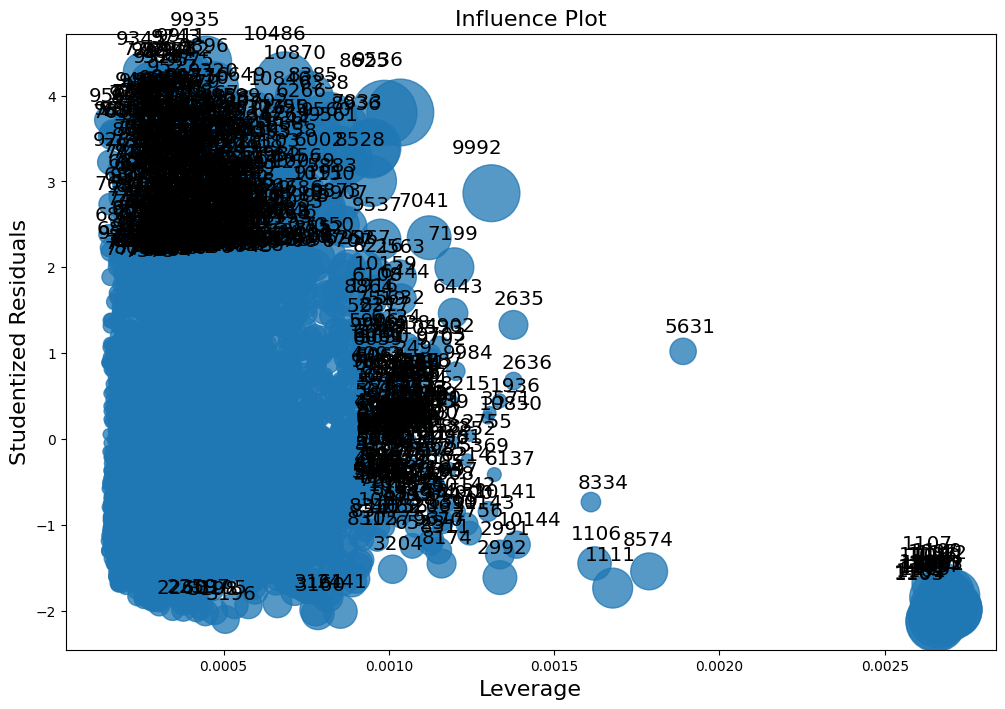

In [21]:
#INFLUENCE PLOT
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In an influence plot, both the size and the position of a point contribute to indicating its influence, but they convey slightly different aspects:

1. **Position**: The position of a point on the x-axis indicates the leverage of that data point. Leverage refers to how far the independent variable values of a data point are from the mean of those independent variables. Points with high leverage can have a significant impact on the regression model's coefficients.

2. **Size**: The size of a point in the influence plot is often proportional to its Cook's distance. Cook's distance measures the effect of deleting a specific observation on the regression coefficients. Large Cook's distances indicate influential points that have a substantial impact on the regression model.

Influence plots are designed to visually show both leverage and Cook's distance simultaneously. Points that are both far from the center (indicating high leverage) and have a larger size (indicating a higher Cook's distance) are considered influential.

Therefore, both the size and position of a point are important to consider when interpreting influence plots. They help you identify data points that have a potential impact on the regression model and its results. However, it's essential to note that the specific criteria for considering a point influential can vary based on the context of your analysis and the goals of your modeling.

In [27]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [31]:
# Identify and remove influential points
threshold = 4 / len(y)  # Set a threshold for Cook's distance

# Find indices of influential points
influential_indices = influence_summary[influence_summary['cooks_d'] > threshold].index

# Remove influential points from the dataset
cleaned_bikes = bikes.drop(index=influential_indices)

# Refit the model with the cleaned dataset
x_cleaned = cleaned_bikes[['temp', 'humidity', 'season']]
y_cleaned = cleaned_bikes['count']

results_cleaned = ols('y_cleaned~x_cleaned', data=cleaned_bikes).fit() #finding the line of best fit - ols(ordianry least sqaures) is a type of model
print(results_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:              y_cleaned   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     1656.
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:11:12   Log-Likelihood:                -64564.
No. Observations:               10342   AIC:                         1.291e+05
Df Residuals:                   10338   BIC:                         1.292e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      165.8247      5.498     30.162   

In [32]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [33]:
pred_vals2 = results_cleaned.predict(cleaned_bikes[['temp','humidity','season']])
res2 = pd.concat([pred_vals2.to_frame().rename(columns={0:'y_hat'}),cleaned_bikes['count']],axis=1)
res2['error']=res2['y_hat']-res2['count']
res2['sq_error']=res2['error']**2
np.sqrt(res2['sq_error'].mean())

124.46147648146022

((array([-3.81891377, -3.59422324, -3.47088808, ...,  3.47088808,
          3.59422324,  3.81891377]),
  array([-522.61661828, -491.94886547, -471.86037178, ...,  284.75402344,
          288.88240248,  288.92366771])),
 (122.30757903590138, 8.029771155577936e-14, 0.9823532103559824))

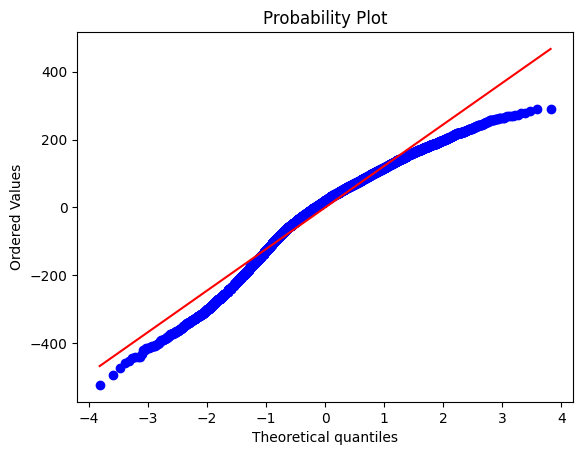

In [34]:
#Q-Q Plot
fig =plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res2['error'],dist='norm',plot=ax)

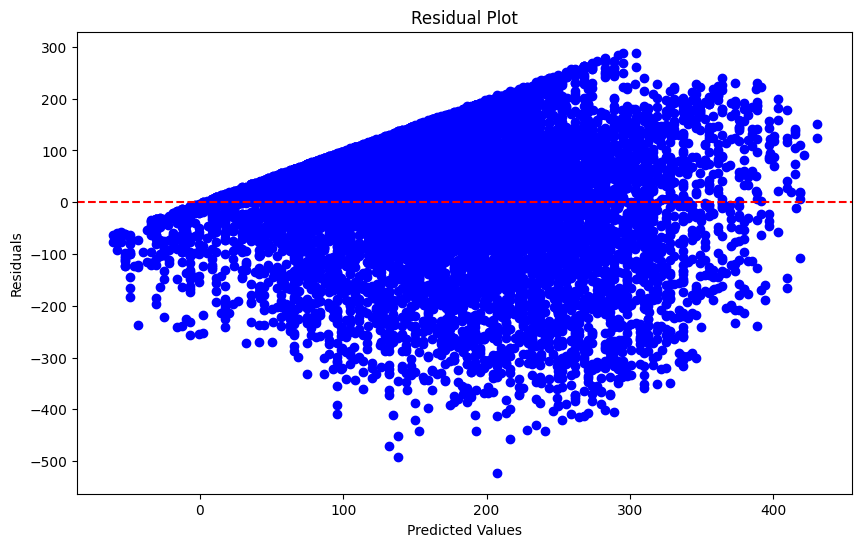

In [35]:
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_vals2, res2['error'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

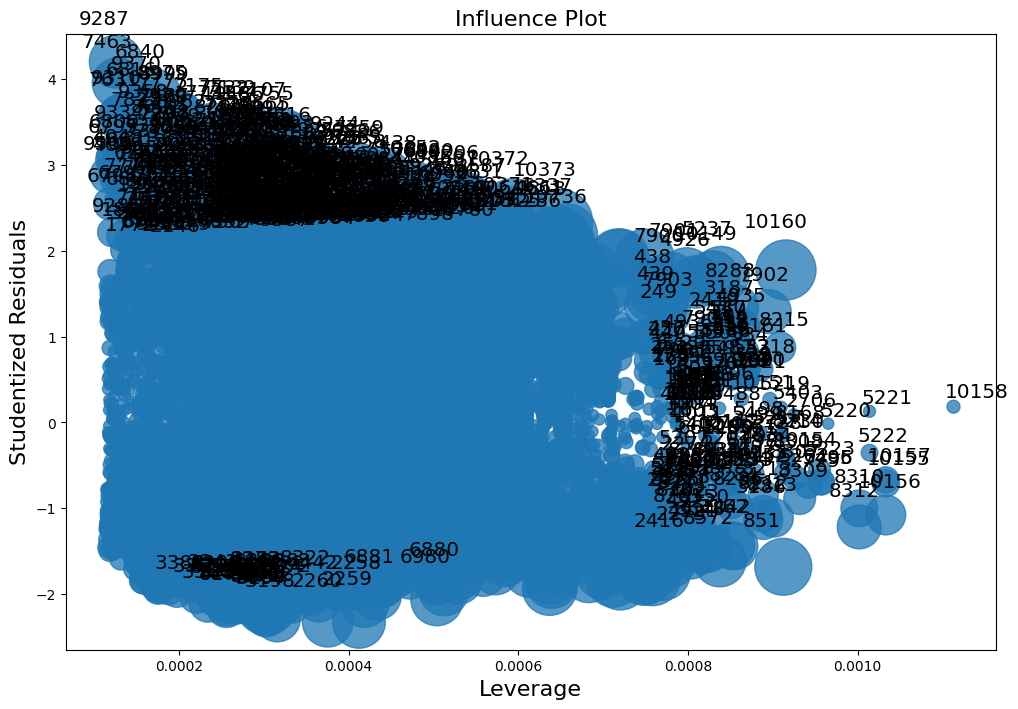

In [36]:
#INFLUENCE PLOT
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_cleaned, ax=ax, criterion='cooks')

In [37]:
cleaned_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10342 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10342 non-null  object 
 1   season      10342 non-null  int64  
 2   holiday     10342 non-null  int64  
 3   workingday  10342 non-null  int64  
 4   weather     10342 non-null  int64  
 5   temp        10342 non-null  float64
 6   atemp       10342 non-null  float64
 7   humidity    10342 non-null  int64  
 8   windspeed   10342 non-null  float64
 9   casual      10342 non-null  int64  
 10  registered  10342 non-null  int64  
 11  count       10342 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.0+ MB


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,ElasticNet,Ridge,Lasso
from sklearn.metrics import mean_squared_error

In [39]:
cleaned_bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [40]:
# defining numerical and categorical variables
cat_var = ['weather','season']
num_var = ['humidity','temp']
target = ['count']

In [41]:
#Splitting Data
X_train,X_test,y_train,y_test = train_test_split(cleaned_bikes[cat_var+num_var],cleaned_bikes[target],test_size=0.2,random_state=1234)

In [42]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_var),('num', num_transformer, num_var)])

In [43]:
# building the final pipeline
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [44]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['humidity', 'temp'])])),
                ('regressor', LinearRegression())])

In [45]:
pred = linear_regression.predict(X_test)
np.sqrt(mean_squared_error(pred,y_test))

119.44047919623358

In [46]:
#ELASTIC NET
elastic_net = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=0.1))
])
elastic_net.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['humidity', 'temp'])])),
                ('regressor', ElasticNet(alpha=0.1))])

In [47]:
pred_en = elastic_net.predict(X_test)
np.sqrt(mean_squared_error(pred_en,y_test))

119.49512959694609

In [48]:
#lasso
lasso = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])
lasso.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['humidity', 'temp'])])),
                ('regressor', Lasso())])

In [49]:
pred_l = lasso.predict(X_test)
np.sqrt(mean_squared_error(pred_l,y_test))

119.28900641125821

In [50]:
#Ridge
ridge = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'season']),
                                                 ('num', StandardScaler(),
                                                  ['humidity', 'temp'])])),
                ('regressor', Ridge())])

In [51]:
pred_r = ridge.predict(X_test)
np.sqrt(mean_squared_error(pred_r,y_test))

119.37367886820931

In [52]:
res_l = pd.concat([pd.DataFrame(pred_l).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})],axis=1)
res_l

,pred,count
0,101.701487,1
1,175.231919,107
2,148.442868,172
3,316.526407,586
4,46.826967,4
...,...,...
2064,298.478117,273
2065,209.616485,251
2066,314.620351,406
2067,170.322599,12


In [53]:
res_l['error']=res_l['pred']-res_l['count']

((array([-3.40160296, -3.15118354, -3.01232101, ...,  3.01232101,
          3.15118354,  3.40160296]),
  array([-439.73614478, -405.24529391, -400.02889951, ...,  281.45324288,
          286.35695076,  304.74280102])),
 (117.44619292817863, 1.9204480717360586, 0.9832374699580984))

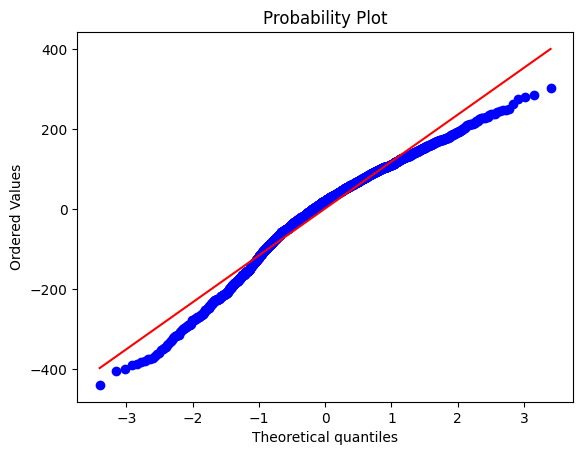

In [54]:
#Q-QPlot
fig =plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res_l['error'],dist='norm',plot=ax)

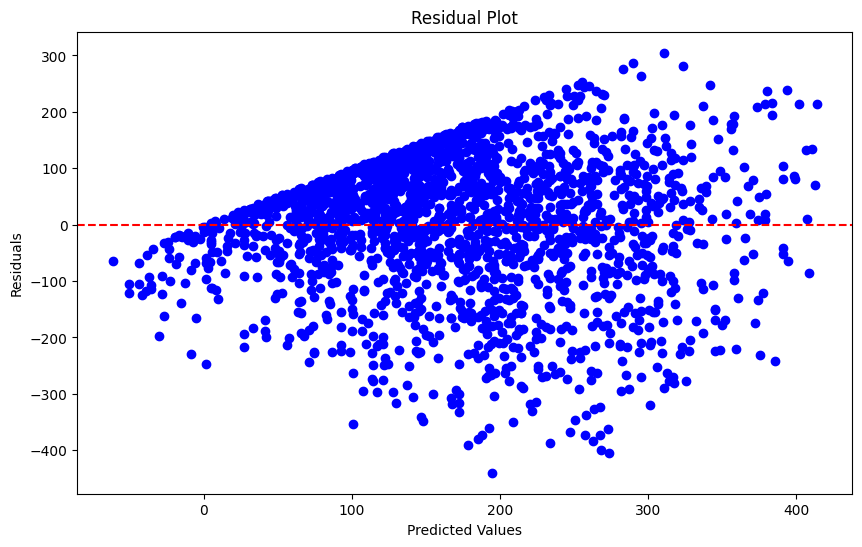

In [55]:
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_l, res_l['error'], color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()